# Sect 25-Pt 2: Intro to Logistic Regression 

- online-ds-ft-100719
- 03/26/20

## Questions?

## From Last Class
- Do we scale/normalize data for LogReg?
    - Test it out  
    
- Logistic Regression docstring/parameters
- `age_ordered, mod_income_ordered = zip(*sorted(zip(age ,mod_income.ravel()),key=lambda x: x[0]))`
- Transforming columns with sklearn
    - Column transformer

## New Questions?/Concerns?/Insights?

- Do we need normally distributed data?
    - What about other types of classification models?
- Log transform before or after splitting?
- Outliers before or after splitting?
- Can we use lasso regression for logistic regression?

- Decision function and ROC?
- How ROC curve is used?


## Topics in Sect 25

- From Tuesday:
    - Supervised vs Unsupervised Learning
    - Logistic Regression
    - Evaluating Classifiers (part 1):
        - Confusion Matrices


- Today:
    - Evaluating Classifiers (part 2)
    - Class Imbalance Problems

# Previously on...
## Implementing Logistic Regression

#### Predict Passenger Survival on Titanic

In [1]:
# !pip install fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.7.16 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
df = fs.datasets.load_titanic(read_csv_kwds={'index_col':0})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Survived'].value_counts(normalize=True,dropna=False)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

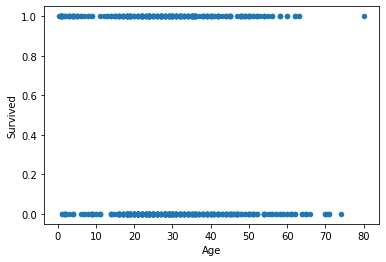

In [4]:
df.plot('Age','Survived',kind='scatter');

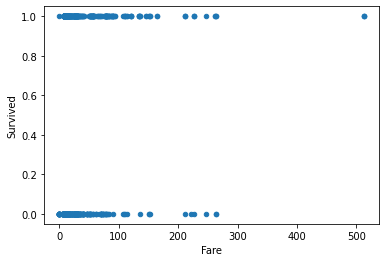

In [5]:
df.plot('Fare','Survived',kind='scatter');

### Q: What are the preprocessing steps I need to perform before I create the model?

- Fill/drop in missing/null values
- Feature Selection / Feature Engineering (interaction terms)
- Handling categorial variables
    - One Hot Encoding 
    - Label Encoding
- Handling Outliers (maybe apply today)
- Normalizing/Standardizing our data

- **Multicollinearity (does it still matter as much for Logistic?)**

- Train-test-split


### A: 

- Address null values
- Encode categorical data
- Train-test-split
- Train Model with train data
- Evaluate Model with test data

### Preprocessing

In [6]:
## Null Values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
# df[['Age']]

In [10]:
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])


In [11]:
df.shape

(891, 12)

In [12]:
## Fill null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = imputer.fit_transform(df[['Embarked']])
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
df['Cabin'].fillna('Missing',inplace=True)
df.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
## Check dtypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
df['Name'].nunique()

891

In [17]:
df.select_dtypes('object').columns

Index(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [18]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
## Encode categorical variables 
x_feats = ['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']
X = pd.get_dummies(df[x_feats],drop_first=True)#
X.head()

,Age,SibSp,Fare,Pclass_2,Pclass_3,Pclass_?,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,7.2500,0,1,0,1,0,1
1,38.0,1,71.2833,0,0,0,0,0,0
2,26.0,0,7.9250,0,1,0,0,0,1
3,35.0,1,53.1000,0,0,0,0,0,1
4,35.0,0,8.0500,0,1,0,1,0,1


In [20]:
y = df['Survived'].copy()
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [21]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_test.shape

((712, 9), (179,))

In [22]:
## Scale data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler= MinMaxScaler()

X_train_sca = pd.DataFrame(scaler.fit_transform(X_train), 
                           columns=X_train.columns, index=X_train.index)

X_test_sca = pd.DataFrame(scaler.transform(X_test),
                          columns=X_test.columns, index = X_test.index)

In [23]:
## Verify scaling
X_train_sca.describe().round(2).loc[['min','max']]

,Age,SibSp,Fare,Pclass_2,Pclass_3,Pclass_?,Sex_male,Embarked_Q,Embarked_S
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [24]:
X_test_sca.describe().round(2).loc[['min','max']]

,Age,SibSp,Fare,Pclass_2,Pclass_3,Pclass_?,Sex_male,Embarked_Q,Embarked_S
min,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
max,0.89,0.5,0.51,1.0,1.0,1.0,1.0,1.0,1.0



## Fitting a Logistic Regression with `sklearn`

In [25]:
from sklearn.linear_model import LogisticRegression#LinearRegression

In [26]:
help(LogisticRegression)


Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
 |  that regularization is applied by default**. It can handle both dense
 |  and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
 |  floats for optimal performance; any other input format will be conv

In [27]:
regr = LogisticRegression(C=1e5, solver='liblinear')
regr.fit(X_train_sca, y_train)

y_hat_test = regr.predict(X_test_sca)

In [28]:
## Fit a logistic regression model with defaults


In [29]:
## Fit a logistic regression with params from lab/lessons

In [30]:
# logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear',
#                            max_iter=1000)

# Evaluating Predictions - Confusion Matrix

- A **confusion matrix** separates our predictions into 4 types of outcomes (for a binary classification):
    - **_True Positives (TP)_**: The number of observations where the model predicted the person has the disease (1), and they actually do have the disease (1).

    - **_True Negatives (TN)_**: The number of observations where the model predicted the person is healthy (0), and they are actually healthy (0).

    - **_False Positives (FP)_**: The number of observations where the model predicted the person has the disease (1), but they are actually healthy (0). 

    - **_False Negatives (FN)_**: The number of observations where the model predicted the person is healthy (0), but they actually have the disease (1).

    <img src="images/conf_matrix.jpeg" width=50%>

In [31]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_hat_test)

0.7932960893854749

In [33]:
## get confusion matrix
cm = confusion_matrix(y_test,y_hat_test)
cm

array([[89, 16],
       [21, 53]])

In [34]:
cm[0].sum()

105

In [35]:
cm.sum(axis=1)

array([105,  74])

In [36]:
cm_norm = cm / cm.sum(axis=1)[:,np.newaxis]
cm_norm

array([[0.84761905, 0.15238095],
       [0.28378378, 0.71621622]])

In [37]:
def get_conf_matrix(y_true,y_pred,normalize=True):
    cm = confusion_matrix(y_true,y_pred)
    
    if normalize:
        cm = cm / cm.sum(axis=1)[:,np.newaxis]
        cm = cm.round(3)
    return cm


cm = get_conf_matrix(y_test,y_hat_test)
cm    

array([[0.848, 0.152],
       [0.284, 0.716]])

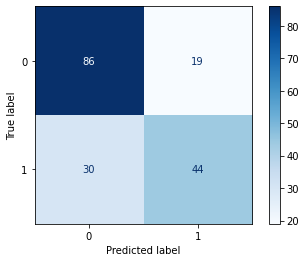

In [38]:
plot_confusion_matrix(regr,X_test,y_test,cmap='Blues')

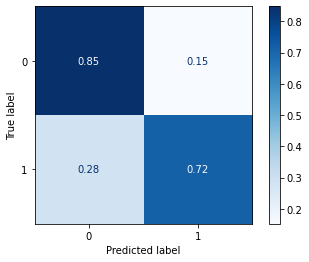

In [41]:
plot_confusion_matrix(regr,X_test,y_test,cmap='Blues',normalize='true')

In [42]:
## COMPARED NOT-SCALED DATA
regr = LogisticRegression(C=1e5, solver='liblinear')
regr.fit(X_train, y_train)

y_hat_test = regr.predict(X_test)

### Visualizing Confusion Matrices

In [44]:
# Here we iterate through the confusion matrix and append labels to our visualization 
def plot_cm(cnf_matrix,thresh=0.5):
    import itertools
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.xticks(ticks=[0,1],labels=['Died','Survived'])
    plt.yticks(ticks=[0,1],labels=['Died','Survived'])

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')
    plt.colorbar()
    
#     acc = accuracy_score(y_test,/.predict(X_test))
#     plt.title(f"Confusion Matrix (overall acc={round(acc,2)})")
    plt.show()

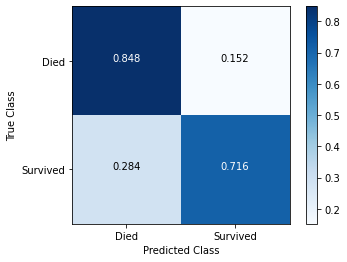

In [45]:

plot_cm(cm_norm.round(3))

0.7932960893854749


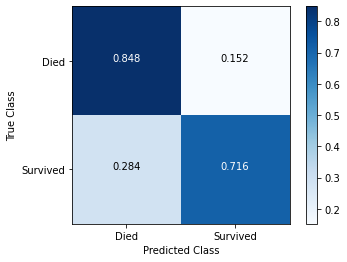

In [46]:
# ## Sklearn Now has a plot_confusion_matrix function (if update)
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_test,y_hat_test)
cm_norm = cm / cm.sum(axis=1)[:,np.newaxis]
print(accuracy_score(y_test,y_hat_test))
plot_cm(cm_norm.round(3))

0.7988826815642458


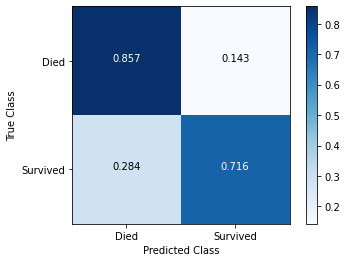

In [47]:
regr = LogisticRegression()#C=1e5, solver='liblinear')
regr.fit(X_train_sca, y_train)

y_hat_test = regr.predict(X_test_sca)

cm = confusion_matrix(y_test,y_hat_test)
cm_norm = cm / cm.sum(axis=1)[:,np.newaxis]
print(accuracy_score(y_test,y_hat_test))
plot_cm(cm_norm.round(3))

# Evaluating Classifications

# Confusion Matrix

**Confusion matrix:**
- diagonals are true positives
- y-axis (usually the true label)
    + False negatives when read horizontal
    + False positives when read vertically

## Examples

### Simple

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-3-27-06-confusion-matrices-online-ds-sp-000/master/index_files/index_7_0.png'/>

### Multiple Classes

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-3-27-06-confusion-matrices-online-ds-sp-000/master/index_files/index_9_0.png' />

### American Sign Language Classification Example

https://github.com/MrGeislinger/ASLTransalation

<img src='https://raw.githubusercontent.com/MrGeislinger/ASLTransalation/master/fingerspelling/paper/images/resnet50_confusionMatrix.png?token=ACE4BRYOSBINDWBWH3UOJDK43V3EO' />

We have to consider how well we can just "guess" a classifier

Compare False Positive rate vs True Positive rate!

## Other Classification Metrics
- Using TP/TN/FP/FN, can calculate several other metrics to evaluate our model.

- Metrics:
    - Accuracy
    - Precision
    - Recall
    - F1 Score
    
- A **confusion matrix** separates our predictions into 4 types of outcomes (for a binary classification):
    - **_True Positives (TP)_**: The number of observations where the model predicted the person has the disease (1), and they actually do have the disease (1).

    - **_True Negatives (TN)_**: The number of observations where the model predicted the person is healthy (0), and they are actually healthy (0).

    - **_False Positives (FP)_**: The number of observations where the model predicted the person has the disease (1), but they are actually healthy (0). 

    - **_False Negatives (FN)_**: The number of observations where the model predicted the person is healthy (0), but they actually have the disease (1).

    <img src="images/conf_matrix.jpeg" width=50%>

0.7988826815642458


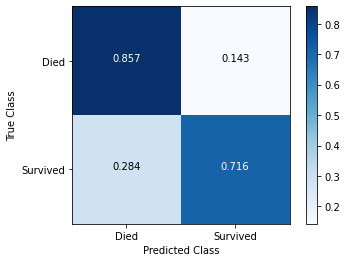

In [48]:
# from sklearn
regr = LogisticRegression()#C=1e5, solver='liblinear')
regr.fit(X_train_sca, y_train)

y_hat_test = regr.predict(X_test_sca)

cm = confusion_matrix(y_test,y_hat_test)
cm_norm = cm / cm.sum(axis=1)[:,np.newaxis]
print(accuracy_score(y_test,y_hat_test))
plot_cm(cm_norm.round(3))

## Accuracy

$$ \large \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} $$

> "Out of all the predictions our model made, what percentage were correct?"
- "Accuracy is the most common metric for classification. It provides a solid holistic view of the overall performance of our 
model."


In [49]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_hat_test).round(2)

0.8

## Precision & Recall

### Precision

> "**_Precision_** measures how precise the predictions are, while **_Recall_** indicates what percentage of the classes we're interested in were actually captured by the model."

$$ \large \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $$


In [50]:
metrics.precision_score(y_test,y_hat_test).round(2)

0.78

### Recall

$$ \large \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$ 


In [51]:
metrics.recall_score(y_test,y_hat_test)

0.7162162162162162

<img src='https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/precisionrecall.png' width=75%>

## $F_1$ Score

F1 score represents the **_Harmonic Mean of Precision and Recall_**.  In short, this means that the F1 score cannot be high without both precision and recall also being high. When a model's F1 score is high, you know that your model is doing well all around. 

> Harmonic Mean: "the reciprocal of the arithmetic mean of the reciprocals of a given set of observatins." - *[Wikipedia](https://en.wikipedia.org/wiki/Harmonic_mean)*

#### Arithmetic Mean:

$$\large \bar{X} = \frac{a+b+c}{n} $$

#### Harmonic Mean:

$$ \large \bar{X} = \frac{n}{\frac{1}{a}+ \frac{1}{b}+ \frac{1}{c}}$$


**The formula for F1 score is:**

> $$ \text{F1 score} =  \frac{2}{\text{Precision}^{-1}\ x\ \text{Recall}^{-1}}= 2\ \frac{\text{Precision}\ x\ \text{Recall}}{\text{Precision} + \text{Recall}} $$

In [52]:
metrics.f1_score(y_test,y_hat_test)

0.7464788732394366

## Which metric to use?

- **When in doubt, use them all!** 
 -`metrics.classification_report`
 

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



- **But some good rules of thumb:**
    - **Accuracy** is good for non-technical audiences (but can be misleading with imbalanced classes)
    
    - **Use recall** when the number of true positives/opportunities is small and you don’t want to miss one.
        - e.g. cancer diagnosis. (telling someone they do not have cancer when they actually do is fatal)
    - **Use precision** when the cost of acting is high and acting on a positive is costly.
       - e.g. Allocating resources/interventions for prisoners who are at-risk for recidivism. 

- **F1 score** is really the most informative about overall model quality, but is the most difficult to express to a non-tech audience

# ROC Curve - Receiver Operating Characteristic Curve

## Evaluating Our Model

### Graph Interpretation

False Positive Rate vs True Positive Rate → for each threshold

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/roc_comparison.png" width=70%>

### Looking at Just the Logistic Regression

Imagine we have a logistic regression (classifier):
 - Turn a continuous feature to binary prediction

[**What's the threshold?**](http://app.ziteboard.com)

### What Distributions Would Work Well in Classifying?

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/roc_crossover.png">

### Defining the Threshold

![](https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/auc_rates.png)

In [54]:
# Interactive ROC curve
from IPython.display import IFrame
IFrame('http://www.navan.name/roc/', width=900, height=600)

In [62]:
from sklearn.metrics import roc_curve, auc

# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites
y_score = regr.decision_function(X_test)
y_score_prob = regr.predict_proba(X_test)

y_score.shape, y_score_prob.shape

((179,), (179, 2))

In [63]:
y_score_prob

array([[1.00000000e+00, 8.54441757e-11],
       [1.00000000e+00, 1.85022278e-13],
       [9.99999995e-01, 4.69104319e-09],
       [1.09905418e-11, 1.00000000e+00],
       [9.99140742e-01, 8.59257839e-04],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.16699730e-12],
       [9.99571577e-01, 4.28422710e-04],
       [9.99990587e-01, 9.41271396e-06],
       [4.14181285e-02, 9.58581871e-01],
       [1.31835648e-01, 8.68164352e-01],
       [1.00000000e+00, 1.90151319e-21],
       [9.99999581e-01, 4.18841332e-07],
       [1.00000000e+00, 1.74049632e-14],
       [1.00000000e+00, 3.84241258e-15],
       [4.94963692e-09, 9.99999995e-01],
       [9.92119821e-01, 7.88017898e-03],
       [1.00000000e+00, 3.41025482e-12],
       [1.00000000e+00, 2.75047332e-10],
       [9.99958255e-01, 4.17447643e-05],
       [1.00000000e+00, 3.17489770e-11],
       [9.99999980e-01, 2.02104186e-08],
       [9.99999959e-01, 4.12152583e-08],
       [9.99999984e-01, 1.58054106e-08],
       [1.000000

In [52]:

# df_res = pd.DataFrame(dict(class_0 = y_score[:,0],
# class_1 = y_score[:,1]))
# df_res['label'] = y_test.reset_index(drop=True)

In [59]:
# y_score = regr.decision_function(X_test)
fpr,tpr,thresh = roc_curve(y_test,y_score)#[:,1])
print(f"ROC-area-under-the-curve= {round(auc(fpr,tpr),3)}")

ROC-area-under-the-curve= 0.804


[Text(0, 0.5, 'True Positive Rate'),
 Text(0.5, 0, 'False Positive Rate'),
 Text(0.5, 1.0, 'Receiver operating characteristic (ROC) Curve')]

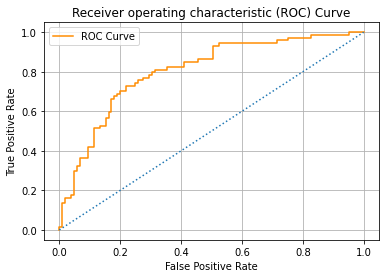

In [60]:
fig,ax=plt.subplots()
ax.plot(fpr,tpr,color='darkorange',label='ROC Curve')
ax.plot([0,1],[0,1],ls=':')
ax.legend()
ax.grid()
ax.set(ylabel='True Positive Rate',xlabel='False Positive Rate',
      title='Receiver operating characteristic (ROC) Curve')


ROC-area-under-the-curve= 0.803


[Text(0, 0.5, 'True Positive Rate'),
 Text(0.5, 0, 'False Positive Rate'),
 Text(0.5, 1.0, 'Receiver operating characteristic (ROC) Curve')]

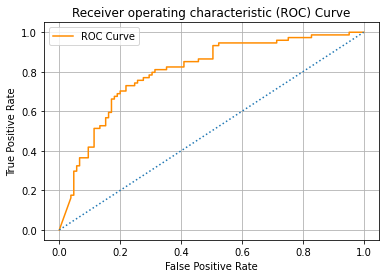

In [65]:
# y_score = regr.decision_function(X_test)
fpr,tpr,thresh = roc_curve(y_test,y_score_prob[:,1])
print(f"ROC-area-under-the-curve= {round(auc(fpr,tpr),3)}")

fig,ax=plt.subplots()
ax.plot(fpr,tpr,color='darkorange',label='ROC Curve')
ax.plot([0,1],[0,1],ls=':')
ax.legend()
ax.grid()
ax.set(ylabel='True Positive Rate',xlabel='False Positive Rate',
      title='Receiver operating characteristic (ROC) Curve')


# Class Imbalance Problems

## The Problem

## When metrics can be misleading...
- i.e. accuracy


              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



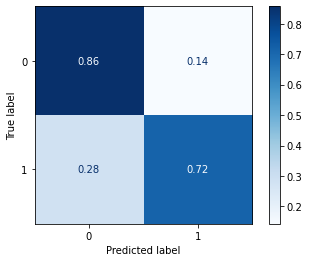

In [66]:
# from sklearn
regr = LogisticRegression()#C=1e5, solver='liblinear')
regr.fit(X_train_sca, y_train)

y_hat_test = regr.predict(X_test_sca)

cm = confusion_matrix(y_test,y_hat_test)
cm_norm = cm / cm.sum(axis=1)[:,np.newaxis]
print(classification_report(y_test,y_hat_test))
# plot_cm(cm_norm.round(3))
plot_confusion_matrix(regr,X_test_sca,y_test,
                     cmap='Blues',normalize='true')

In [71]:
y_train.value_counts(normalize=True)

0    0.623596
1    0.376404
Name: Survived, dtype: float64

In [67]:
y_test.value_counts(normalize=True)

0    0.586592
1    0.413408
Name: Survived, dtype: float64

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179



//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



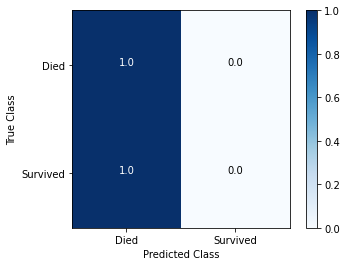

In [72]:
## Let's guess  for every observation
preds = np.zeros_like(y_test)
print(classification_report(y_test,preds))
cm_norm = get_conf_matrix(y_test,preds)
plot_cm(cm_norm)

## The Possible Solutions

- Using class_weights 
- Oversampling the minority class
- Undersampling the majority class

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



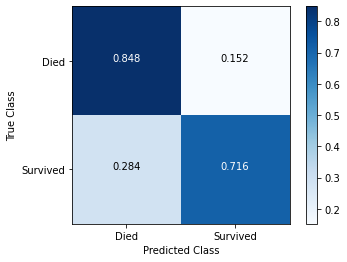

In [75]:
regr = LogisticRegression(C=1e5, solver='liblinear')
regr.fit(X_train_sca, y_train)

y_hat_test = regr.predict(X_test_sca)

cm = confusion_matrix(y_test,y_hat_test)
cm_norm = cm / cm.sum(axis=1)[:,np.newaxis]
print(classification_report(y_test,y_hat_test))
plot_cm(cm_norm.round(3))

### Solution 1: `class_weight="balanced"`


              precision    recall  f1-score   support

           0       0.84      0.80      0.82       105
           1       0.73      0.78      0.76        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.79      0.79       179



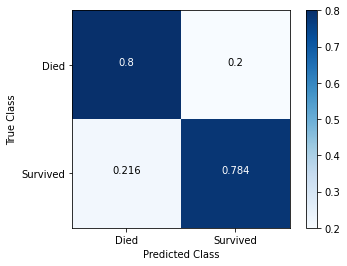

In [73]:
regr = LogisticRegression(class_weight='balanced',C=1e5, solver='liblinear')
regr.fit(X_train_sca, y_train)

y_hat_test = regr.predict(X_test_sca)

cm = confusion_matrix(y_test,y_hat_test)
cm_norm = cm / cm.sum(axis=1)[:,np.newaxis]
print(classification_report(y_test,y_hat_test))
plot_cm(cm_norm.round(3))

### Solution 2: Oversampling minority class with SMOTE

In [76]:
y_train.value_counts()

0    444
1    268
Name: Survived, dtype: int64

In [77]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_sample(X_train_sca,y_train)
pd.Series(y_train_smote).value_counts()

Using TensorFlow backend.
//anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a futu

1    444
0    444
Name: Survived, dtype: int64

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       105
           1       0.73      0.78      0.76        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.79      0.79       179



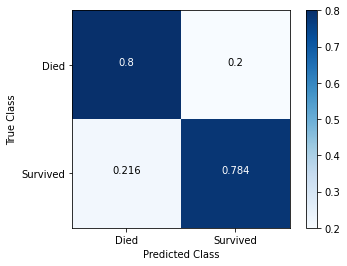

In [78]:
regr = LogisticRegression(class_weight='balanced',C=1e5, solver='liblinear')
regr.fit(X_train_smote, y_train_smote)

y_hat_test = regr.predict(X_test_sca)

cm = confusion_matrix(y_test,y_hat_test)
cm_norm = cm / cm.sum(axis=1)[:,np.newaxis]
print(classification_report(y_test,y_hat_test))
plot_cm(cm_norm.round(3))

### Solution 3: Undersampling majority class

In [79]:
display(X_train,y_train)
df_balance = pd.concat([X_train, y_train],axis=1)
df_balance

,Age,SibSp,Fare,Pclass_2,Pclass_3,Pclass_?,Sex_male,Embarked_Q,Embarked_S
331,45.5,0,28.5000,0,0,0,1,0,1
733,23.0,0,13.0000,1,0,0,1,0,1
382,32.0,0,7.9250,0,1,0,1,0,1
704,26.0,1,7.8542,0,1,0,1,0,1
813,6.0,4,31.2750,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
106,21.0,0,7.6500,0,1,0,0,0,1
270,28.0,0,31.0000,0,0,0,1,0,1
860,41.0,2,14.1083,0,1,0,1,0,1
435,14.0,1,120.0000,0,0,0,0,0,1


331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

,Age,SibSp,Fare,Pclass_2,Pclass_3,Pclass_?,Sex_male,Embarked_Q,Embarked_S,Survived
331,45.5,0,28.5000,0,0,0,1,0,1,0
733,23.0,0,13.0000,1,0,0,1,0,1,0
382,32.0,0,7.9250,0,1,0,1,0,1,0
704,26.0,1,7.8542,0,1,0,1,0,1,0
813,6.0,4,31.2750,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
106,21.0,0,7.6500,0,1,0,0,0,1,1
270,28.0,0,31.0000,0,0,0,1,0,1,0
860,41.0,2,14.1083,0,1,0,1,0,1,0
435,14.0,1,120.0000,0,0,0,0,0,1,1


In [82]:
n_samples = df_balance['Survived'].value_counts().min()
n_samples

268

In [83]:
df_balance.groupby('Survived').groups

{0: Int64Index([331, 733, 382, 704, 813, 118, 536, 361,  29, 595,
             ...
              87, 214, 466, 121, 614,  20,  71, 270, 860, 102],
            dtype='int64', length=444),
 1: Int64Index([ 55, 865,  81, 259, 486, 716, 781, 535, 483, 762,
             ...
             510,  58, 747,  21, 871, 458, 330, 700, 106, 435],
            dtype='int64', length=268)}

In [87]:
df_resample = pd.DataFrame()
for grp,idx in df_balance.groupby('Survived').groups.items():
    
    resample = df_balance.loc[idx].sample(n=n_samples,random_state=123)
    df_resample = pd.concat([df_resample,resample],axis=0)
    
display(df_resample.head(), df_resample["Survived"].value_counts())



,Age,SibSp,Fare,Pclass_2,Pclass_3,Pclass_?,Sex_male,Embarked_Q,Embarked_S,Survived
488,30.0,0,8.0500,0,1,0,1,0,1,0
236,44.0,1,26.0000,1,0,0,1,0,1,0
191,19.0,0,13.0000,1,0,0,1,0,1,0
177,50.0,0,28.7125,0,0,0,0,0,0,0
567,29.0,0,21.0750,0,1,0,0,0,1,0


1    268
0    268
Name: Survived, dtype: int64

              precision    recall  f1-score   support

           0       0.88      0.65      0.75       105
           1       0.64      0.88      0.74        74

    accuracy                           0.74       179
   macro avg       0.76      0.76      0.74       179
weighted avg       0.78      0.74      0.74       179



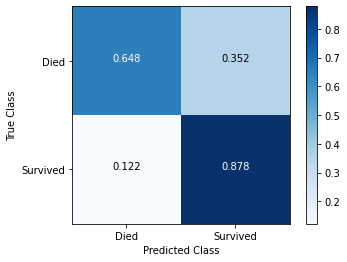

In [88]:
X_train_under = df_resample.drop('Survived',axis=1).copy()
y_train_under = df_resample['Survived'].copy()

regr = LogisticRegression(C=1e5, solver='liblinear')
regr.fit(X_train_under, y_train_under)

y_hat_test = regr.predict(X_test_sca)

cm = confusion_matrix(y_test,y_hat_test)
cm_norm = cm / cm.sum(axis=1)[:,np.newaxis]
print(classification_report(y_test,y_hat_test))
plot_cm(cm_norm.round(3))

# Sect 26: Topics to Discuss

- Recommendation: do not get too stressed out about that this module. Its a lot of revisiting concepts that we've discussed before. 
    - Don't stress about the labs, look at the solutions and digest what they are doing.
    
- [Terms to remember](https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-26-in-depth-logistic-regression/mle-review)
    - "log-likelihood"
    - "Maximum Likelihood Estimation"

# Activity: Make an `evaluate_classification` function

- Write a function called evaluate_classification
- It should accept: 
    - y_true,
    - y_pred
    - 
- It should produce:
    - Classification metrics printed
    - Confusion Matrix displayed
    - roc_auc curve displayed
    
    
- Then revisit some of the questions we had from last class re: scaling, LogisticRegression parameters

In [ ]:

def evaluate_classification(y_true, y_pred): 
    import sklearn.metrics as metrics
     
    ## Classification Report / Scores 
    
    
    ## Confusion Matrix 
    
    
    ## Roc Curve
    
    
    ## LEVEL UP: Subplots
    
    

    
    